https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_11_L2.py

[ 4.91577003e+02  2.46782705e+00 -1.33949487e+00 -1.26641871e+00
 -1.09699330e+00 -1.82830400e-01  6.58125354e-01 -3.03528529e-01
  6.87696082e-02 -8.98124042e-03  6.89773655e-04 -2.90428158e-05
  5.18651269e-07]


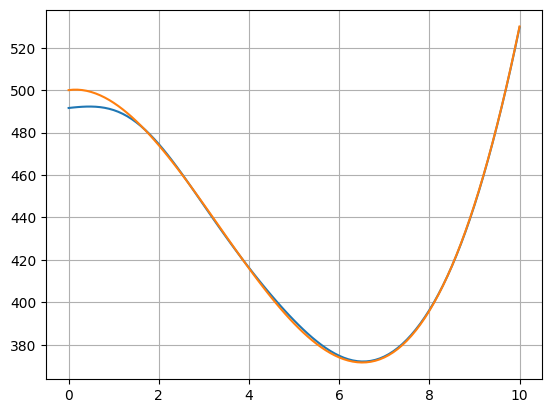

In [ ]:
# @title Пример работы L2-регуляризатора
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix


x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
# display(Matrix(X))        # глянуть на матрицу
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0                # первый коэффициент не регуляризуем
# display(Matrix(IL))       # глянуть на матрицу
X_train = X[::2]            # обучающая выборка
# display(Matrix(X_train))  # глянуть на матрицу
Y = y_train                 # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
# display(Matrix(A))          # глянуть на матрицу
w = A @ X_train.T @ Y
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()